Olá Gerson!

Meu nome é Ramon e te ajudarei neste projeto. Fico feliz em rever seu projeto hoje.

Ao ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberta a feedbacks e discussões sobre o tema.

Você encontrará meus comentários abaixo - **por favor, não os mova, modifique ou exclua**.

Você pode encontrar meus comentários em caixas verdes, amarelas ou vermelhas como esta:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Precisa de correções. O bloqueio requer algumas correções. O trabalho não pode ser aceito com os comentários em vermelho.
</div>

Você pode me responder usando isso:

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>


# Importar as bibliotecas necessarias

In [1]:
import pandas as pd
from matplotlib import rcParams
import matplotlib.pyplot as plt
from IPython.display import display
from IPython.core.display import HTML
import calendar
import numpy as np
from scipy import stats as st

print('Bibliotecas importadas!')

Bibliotecas importadas!


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [2]:
cor = "#2ab0ff"
cor2 = "#1071b2"

# Carregar os dataframes

- Para facilitar alguns processos repetitivos, a abordagem que adotei consiste em preparar um dicionario onde as chaves sao os nomes dos dataframes e os valores sao os dataframes completos.

- Se necessario iremos separar em variaveis diferentes

In [3]:
url_base = 'https://code.s3.yandex.net/datasets/'

file_names = ['megaline_calls', 'megaline_internet', 'megaline_messages', 'megaline_plans','megaline_users']

dfs = {}

for file in file_names:
    dfs[file] = ( pd.read_csv(url_base + file + '.csv') )

#Converter para tuple e isolar cada df numa variavel
(df_megaline_calls, df_megaline_internet, df_megaline_messages, df_megaline_plans, df_megaline_users) = tuple(dfs.values())

print('Dataframes carregados')

Dataframes carregados


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Parabéns pela proficiência em usar recursos mais avançados
</div>

# Verificacoes iniciais

**Ver uma amostra de cada dataframe**

**Ver as informacoes gerais para cada dataframe**

In [4]:
for df in dfs.items():
    display( HTML( f'<h2 style="color:#2ab0ff">{df[0]}</h2>') )

    display( HTML( f'<h3>Tamanho do dataframe: {len(df[1])} registos </h3>') )
    display( HTML( f'<h3>Total de duplicados: { ( df[1].duplicated().sum() ) }  </h3>') )

    display( HTML( f'<h3>Amostra</h3>') )
    display(df[1].sample(2))
    display( HTML( f'<h3>Informacoes Gerais</h3>') )
    print('\n', df[1].info())
    display( HTML( f'<h3>Total de valores ausentes por coluna</h3>') )
    print(df[1].isna().sum())

    display(HTML ('<hr>')) # Criar um alinha horizontal 

,id,user_id,call_date,duration
118883,1414_181,1414,2018-11-06,4.17
34586,1130_106,1130,2018-10-19,3.42


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB

 None


id           0
user_id      0
call_date    0
duration     0
dtype: int64


,id,user_id,session_date,mb_used
92988,1434_222,1434,2018-12-06,0.00
85605,1399_216,1399,2018-11-29,256.89


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB

 None


id              0
user_id         0
session_date    0
mb_used         0
dtype: int64


,id,user_id,message_date
3787,1038_140,1038,2018-12-01
63549,1405_251,1405,2018-07-22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB

 None


id              0
user_id         0
message_date    0
dtype: int64


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes

 None


messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
361,1361,Jacelyn,Hoffman,45,"Birmingham-Hoover, AL MSA",2018-04-14,surf,NaN
207,1207,Samuel,Porter,63,"Omaha-Council Bluffs, NE-IA MSA",2018-12-22,surf,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

 None


user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Parabéns pelo uso de recursos mais avançados
</div>

# Visualizacao das distribuicoes

In [5]:
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['axes.labelsize'] = 'x-large'
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

def plotHistByUser_LineByDates(df:pd.DataFrame = None, titulo:str = '[ToSet]', date_col:str = None):
    plt.style.use('seaborn-whitegrid')

    fig = plt.figure()
    #fig.suptitle('---- CHAMADAS -----', fontsize=20)
    fig.set_size_inches(25,10)

    # Adds subplot on position 1
    ax1 = fig.add_subplot(1, 2, 1) # 1 linha, 2 colunas, indice 1 (primeiro grafico)
    # Adds subplot on position 2
    ax2 = fig.add_subplot(122) # 1 linha, 2 colunas, indice 2 (segundo grafico)

    display(HTML('<hr>'))
    display(HTML(f'<h1 style="color:#ffffff; background-color:#2ab0ff; display:inline-block">{titulo.title()}<h1>'))

    #Histogram
    df_temp = df.pivot_table(index=['user_id'], values=['id'], aggfunc=['count'])
    df_temp.hist(grid=False, facecolor = '#2ab0ff', edgecolor='#ffffff', linewidth=5, ax= ax1)

    #Line plot
    df_temp = df.pivot_table(index=[date_col], values=['id'], aggfunc=['count'])
    df_temp.plot(grid=False, linewidth=1, color='#2ab0ff', ax=ax2)

    ax1.set_xlabel('Valores', fontsize=16)
    ax1.set_ylabel('Quantidade de Registos', fontsize=16)
    ax1.set_title('Histograma - ' + f'{titulo.title()} por user', fontsize=20, x = 0.3, y = 1.05)
    ax1.yaxis.grid(True, color ="black", alpha=0.16)

    ax2.set_xlabel('Nº de Chamadas', fontsize=16)
    ax2.set_ylabel('Data', fontsize=16)
    ax2.set_title(f'Total de {titulo} no intervalo de tempo', fontsize=20, x = 0.3, y = 1.05)
    ax2.yaxis.grid(True, color ="black", alpha=0.16)
    ax2.xaxis.grid(True, color ="black", alpha=0.16)



## Chamadas

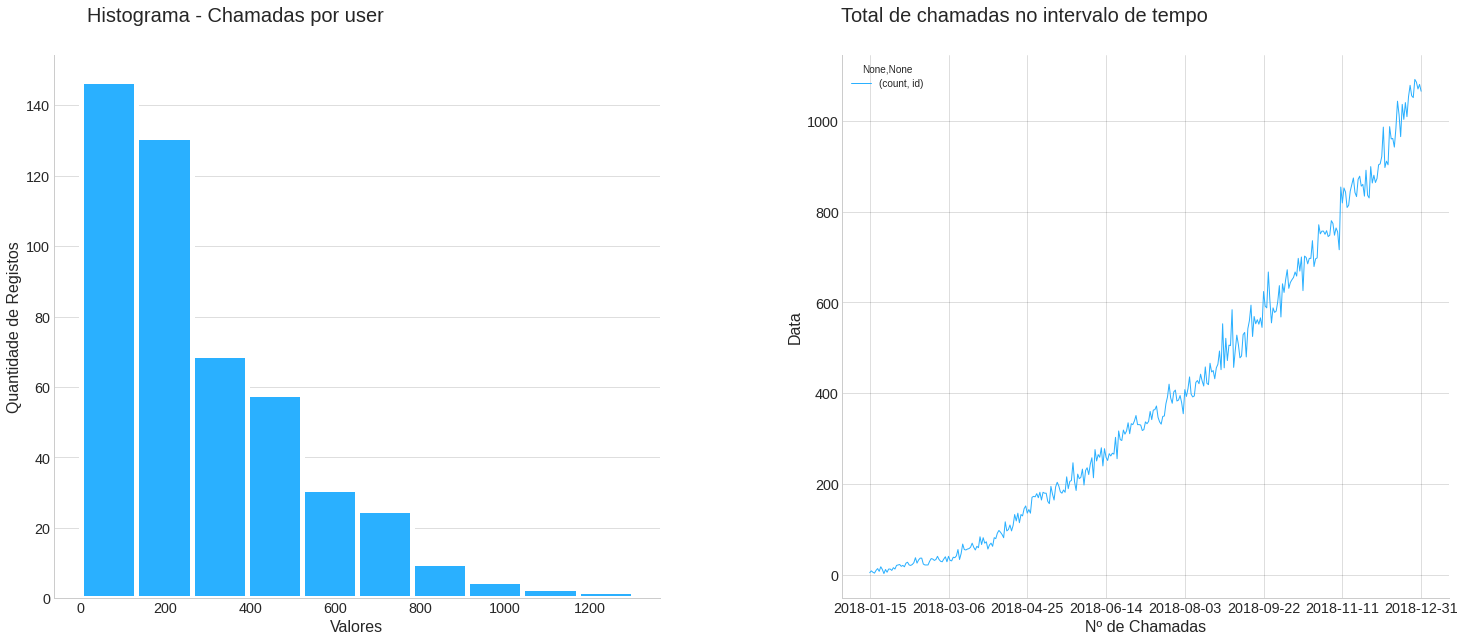

In [6]:
plotHistByUser_LineByDates(df_megaline_calls,'chamadas', 'call_date')

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Uso adequado de gráficos de barras e linha
</div>

## Volume de dados

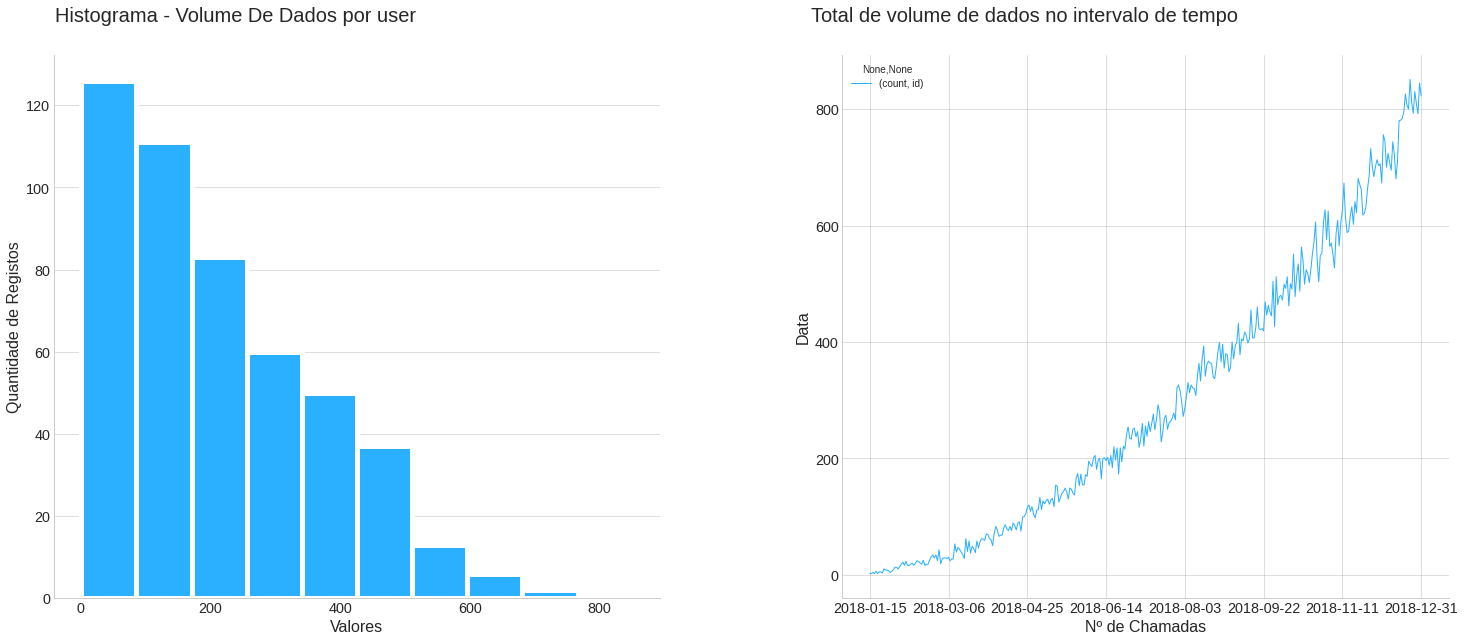

In [7]:
plotHistByUser_LineByDates(df_megaline_internet,'volume de dados', 'session_date')

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

## Mensagens

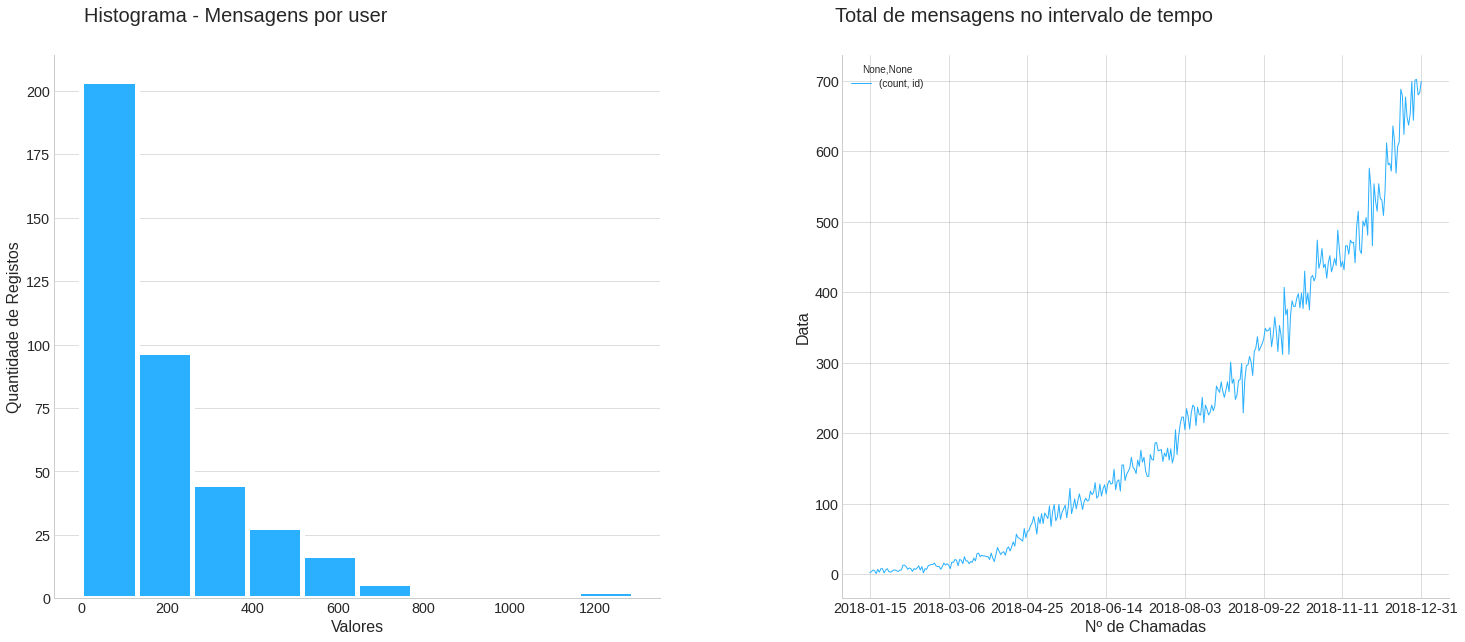

In [8]:
plotHistByUser_LineByDates(df_megaline_messages,'mensagens', 'message_date')

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

# Transformacao dos dados

## Valores ausentes

A unica coluna que apresenta valores ausentes e a `chrn_date` da tabela `megaline_users`

Por ser a unica coluna iremos tratar agora.

Sabemos que a coluna refere-se a data que o usuário parou de usar o serviço e recebemos a informacão que se o valor for ausente, **quer dizer que até o momento da extração do dataset o plano esta activo**.

Sendo assim iremos substituir os valores ausentes por `1970-01-01` que é considerado como um valor não definido.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [9]:
df_megaline_users['churn_date'] = df_megaline_users.churn_date.fillna('1970-01-01')

df_megaline_users.isna().any()

user_id       False
first_name    False
last_name     False
age           False
city          False
reg_date      False
plan          False
churn_date    False
dtype: bool

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Sem mais valores ausentes

## Alterar o tipo dos dados


**Conveter para datetime as colunas que seguem**

`call_date` do dataframe `megaline_calls` 

`session_date`  do dataframe `megaline_internet`

`message_date`  do dataframe `megaline_messages` 

`reg_date`  do dataframe `megaline_users`

In [10]:
dfs['megaline_calls']['call_date'] = pd.to_datetime( dfs['megaline_calls']['call_date'], format = '%Y-%m-%d' )

dfs['megaline_internet']['session_date'] = pd.to_datetime( dfs['megaline_internet']['session_date'], format = '%Y-%m-%d' )

dfs['megaline_messages']['message_date'] = pd.to_datetime( dfs['megaline_messages']['message_date'], format = '%Y-%m-%d' )

dfs['megaline_users']['reg_date'] = pd.to_datetime( dfs['megaline_users']['reg_date'], format = '%Y-%m-%d' )


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

**Felizmente as variaveis estao vinculadas aos valores do dicionario entao podemos verificar uma variavel apenas.**

In [11]:
df_megaline_calls.dtypes

id                   object
user_id               int64
call_date    datetime64[ns]
duration            float64
dtype: object

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

# Validacao da duracao das chamadas invalidas

In [12]:
#Total de valores unicos:
df_megaline_calls.duration.nunique()

2802

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [13]:
#Total de chamadas com a duracao de 0 segundos.
total0Sec = len ( df_megaline_calls.query('duration == 0.0') )
total0Sec

26834

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Como você já programa bem, veja este link que mostra que query() é mais lento: https://stackoverflow.com/questions/49936557/pandas-dataframe-loc-vs-query-performance
</div>

In [14]:
print( f'Representa {round ( total0Sec / len (df_megaline_calls) * 100, 2)}% do dataframe')

Representa 19.48% do dataframe


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Certamente os registos transmitem alguma mensagem como por exemplo estarmos diante de chamadas perdidas.

Quase 20 % e uma amostra consideravelmente alta entao por agora, nao iremos remover os registos.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

# Achar os seguintes resultados para cada user.

- O número de chamadas feitas e minutos usados por mês.
- O número de mensagens de texto enviadas por mês.
- O volume de dados por mês.
- A receita mensal para cada usuário

## Numero de chamadas e minutos usados por mes 

In [15]:
df_megaline_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Criar a coluna mes para poder agrupar

In [16]:
df_megaline_calls['mes'] = df_megaline_calls.call_date.dt.month

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Criar a tabela dinamica para atender o solicitado.

In [17]:
total_chamadas_por_user = df_megaline_calls.pivot_table(index=['user_id','mes'], values=['duration'], aggfunc=['count','sum'])
total_chamadas_por_user.columns = ['total_chamadas', 'total_minutos']
total_chamadas_por_user

total_chamadas  total_minutos
user_id mes                               
1000    12               16         116.83
1001    8                27         171.14
        9                49         297.69
        10               65         374.11
        11               64         404.59
...                     ...            ...
1498    12               39         324.77
1499    9                41         330.37
        10               53         363.28
        11               45         288.56
        12               65         468.10

[2258 rows x 2 columns]

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

## O número de mensagens de texto enviadas por mês.

In [18]:
df_megaline_messages['mes'] = df_megaline_messages.message_date.dt.month

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [19]:
total_msg_por_user = df_megaline_messages.pivot_table(index=['user_id','mes'], values=['id'], aggfunc=['count'])
total_msg_por_user.columns = ['total_mensagens']
total_msg_por_user

total_mensagens
user_id mes                 
1000    12                11
1001    8                 30
        9                 44
        10                53
        11                36
...                      ...
1496    9                 21
        10                18
        11                13
        12                11
1497    12                50

[1806 rows x 1 columns]

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

## O volume de dados por mês.

In [20]:
df_megaline_internet['mes'] = df_megaline_internet.session_date.dt.month

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [21]:
total_dados_por_user = df_megaline_internet.pivot_table(index=['user_id','mes'], values=['mb_used'], aggfunc=['sum'])
total_dados_por_user.columns = ['volume_dados']
total_dados_por_user

volume_dados
user_id mes              
1000    12        1901.47
1001    8         6919.15
        9        13314.82
        10       22330.49
        11       18504.30
...                   ...
1498    12       23137.69
1499    9        12984.76
        10       19492.43
        11       16813.83
        12       22059.21

[2277 rows x 1 columns]

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

## A receita mensal para cada usuário 

A receita mensal sera calculada pela seguinte formula:

> ( ( minutos_plano - minutos_consumidos ) x custo_por_min_extra)

Para realizar o calculo, iremos juntar os dataframes pelo codigo do user e mes.

In [22]:
df_control = total_msg_por_user.reset_index() \
  .merge( total_chamadas_por_user.reset_index(), on=['user_id','mes'], how='outer' ) \
  .merge( total_dados_por_user.reset_index(), on=['user_id','mes'], how='outer' )

df_control.sort_values(by=['user_id', 'mes'], inplace=True) 
df_control.fillna(0, inplace=True) # substituir os NaNs de consumo ausente por 0

print('\n Dataframe com os totais \n')
display ( df_control.head())

# Juntar os dados do user no dataframe criado

df_control = df_megaline_users.merge(df_control, on=['user_id'], how='left')
print('\n Dataframe com os dados do user:\n')
df_control.head()


 Dataframe com os totais 



,user_id,mes,total_mensagens,total_chamadas,total_minutos,volume_dados
0,1000,12,11.0,16.0,116.83,1901.47
1,1001,8,30.0,27.0,171.14,6919.15
2,1001,9,44.0,49.0,297.69,13314.82
3,1001,10,53.0,65.0,374.11,22330.49
4,1001,11,36.0,64.0,404.59,18504.30



 Dataframe com os dados do user:



,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,mes,total_mensagens,total_chamadas,total_minutos,volume_dados
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,1970-01-01,12.0,11.0,16.0,116.83,1901.47
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1970-01-01,8.0,30.0,27.0,171.14,6919.15
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1970-01-01,9.0,44.0,49.0,297.69,13314.82
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1970-01-01,10.0,53.0,65.0,374.11,22330.49
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1970-01-01,11.0,36.0,64.0,404.59,18504.30


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Ver se restou algum registo no sem os dados do user

In [23]:
df_control [ df_control.first_name.isna() ]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,mes,total_mensagens,total_chamadas,total_minutos,volume_dados


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Iremos olhar o dataframe que tem a informacao dos planos:

In [24]:
df_megaline_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

A funcao abaixo ira retornar o montante do consumo de chamadas para cada user 

In [25]:
def calc_consumo_chamadas(row):

    plano = df_megaline_plans.query('plan_name == @row.plan') 

    if row.total_minutos > plano.minutes_included.values[0]:
        return ( plano.minutes_included.values[0] - row.total_minutos )  * plano.usd_per_minute.values[0]

    return 0.0


<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Acho que há um erro: vai gerar valores negativos pois se entrar no IF row.total_minutos  - plano.minutes_included.values[0] > 0 e você está subtraindo ao contrário
</div>

Podemos ver para um dos planos alguns registos que notaremos o valor mensal mais o extra consumido

In [26]:
display ( df_control.query('total_minutos >= 500').head(5) )

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,mes,total_mensagens,total_chamadas,total_minutos,volume_dados
9,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,1970-01-01,12.0,50.0,149.0,1041.00,27044.14
23,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,1970-01-01,10.0,59.0,80.0,610.65,37885.63
25,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,1970-01-01,12.0,50.0,87.0,579.43,29069.28
28,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,1970-01-01,12.0,26.0,85.0,600.29,14689.33
30,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,1970-01-01,6.0,0.0,110.0,775.52,18845.90


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Teste da funcao criada com o primeiro registo que excedeu o total de minutos do plano surf

In [27]:
amostra_teste = df_control.query('total_minutos >= 500 and plan == "surf"').iloc[0]

display(amostra_teste)

print(f'\n Renda Telefone :  {calc_consumo_chamadas ( amostra_teste )} usd')


user_id                           1003
first_name                    Reynaldo
last_name                      Jenkins
age                                 52
city                     Tulsa, OK MSA
reg_date           2018-01-28 00:00:00
plan                              surf
churn_date                  1970-01-01
mes                               12.0
total_mensagens                   50.0
total_chamadas                   149.0
total_minutos                   1041.0
volume_dados                  27044.14
Name: 9, dtype: object


 Renda Telefone :  -16.229999999999993 usd


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [28]:
# Apenas para confirmar:
print( (500 - 1041)  * 0.03 ) # Custo adicional por minuto

-16.23


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. É importante testar a função
</div>

Aplicar a funcao para todos os registos.

In [29]:
df_control['renda_telefone_usd'] = df_control.apply( calc_consumo_chamadas, axis = 'columns' )

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Ver o resultado para alguns registos

In [30]:
df_control.query('total_minutos >= 500').head(5).iloc[:, 6:]

,plan,churn_date,mes,total_mensagens,total_chamadas,total_minutos,volume_dados,renda_telefone_usd
9,surf,1970-01-01,12.0,50.0,149.0,1041.00,27044.14,-16.2300
23,surf,1970-01-01,10.0,59.0,80.0,610.65,37885.63,-3.3195
25,surf,1970-01-01,12.0,50.0,87.0,579.43,29069.28,-2.3829
28,ultimate,1970-01-01,12.0,26.0,85.0,600.29,14689.33,0.0000
30,surf,1970-01-01,6.0,0.0,110.0,775.52,18845.90,-8.2656


<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

A última coluna está com valores negativos!
</div>

Similar a funcao criada anteriormente, as funcoes seguintes irao: esta ira calcular o valor mensal do consumo de mensagens e internet para cada user.

In [31]:
def calc_consumo_msg(row):

    plano = df_megaline_plans.query('plan_name == @row.plan') 

    if row.total_mensagens > plano.messages_included.values[0]:
        return ( plano.messages_included.values[0] - row.total_mensagens )  * plano.usd_per_message.values[0]

    return 0.0

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [32]:
def calc_consumo_internet(row):

    plano = df_megaline_plans.query('plan_name == @row.plan') 

    if row.volume_dados > plano.mb_per_month_included.values[0]:
    # Converter a diferenca de mb para gb 1 gb > 1024 mb
        return (( plano.mb_per_month_included.values[0] - row.volume_dados ) / 1024 )  * plano.usd_per_gb.values[0]

    return 0.0

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Aplicar as funcoes para todos os registos

In [33]:
df_control['renda_msg_usd'] = df_control.apply( calc_consumo_msg, axis = 'columns' )

df_control['renda_intenet_usd'] = df_control.apply( calc_consumo_internet, axis = 'columns' )

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Ver uma amostra aleatoria dos calculos feitos.

In [34]:
df_control.query('total_minutos >= 500').sample(5).iloc[:, 6:]

,plan,churn_date,mes,total_mensagens,total_chamadas,total_minutos,volume_dados,renda_telefone_usd,renda_msg_usd,renda_intenet_usd
271,ultimate,1970-01-01,7.0,58.0,78.0,516.19,21455.15,0.0000,0.0,0.000000
858,surf,1970-01-01,8.0,19.0,79.0,562.36,16530.82,-1.8708,0.0,-11.433789
454,surf,1970-01-01,9.0,0.0,106.0,676.15,12047.30,-5.2845,0.0,0.000000
1212,surf,1970-01-01,11.0,27.0,85.0,571.20,21209.66,-2.1360,0.0,-57.125586
464,surf,1970-01-01,3.0,22.0,93.0,687.15,20857.74,-5.6145,0.0,-53.688867


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Valores negativos!
</div>

## Custo total para cada user

`custo_telefone + custo_mensagens + custo_internet + custo_mensal_plano`

Lembrando que os 3 primeiros valores apenas diferem de 0 caso o user tenha excedido o limite.

In [35]:
def calc_consumo_mensal(row):

    plano = df_megaline_plans.query('plan_name == @row.plan') 

    return ( abs( row.renda_telefone_usd) + abs(row.renda_msg_usd) + abs(row.renda_intenet_usd) ) + plano.usd_monthly_pay.values[0]

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Vi que você aqui aplicou a função abs(). Está correto agora, mas o ideal é deixar a função correta.
</div>

Aplicar a funcao criada

In [36]:
df_control['custo_mensal_user'] = df_control.apply( calc_consumo_mensal, axis = 'columns' )

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Validar uma pequena amostra.

In [37]:
df_control.sample(5).iloc[:, 6:]

,plan,churn_date,mes,total_mensagens,total_chamadas,total_minutos,volume_dados,renda_telefone_usd,renda_msg_usd,renda_intenet_usd,custo_mensal_user
51,ultimate,1970-01-01,11.0,58.0,65.0,475.65,22102.97,0.0000,0.00,0.000000,70.000000
404,surf,1970-01-01,12.0,31.0,96.0,702.07,22153.83,-6.0621,0.00,-66.345996,92.408096
1304,surf,1970-01-01,6.0,0.0,97.0,636.36,21632.19,-4.0908,0.00,-61.251855,85.342655
1932,surf,1970-01-01,11.0,11.0,68.0,385.42,20312.23,0.0000,0.00,-48.361621,68.361621
934,surf,1970-01-01,9.0,76.0,0.0,0.00,37298.02,0.0000,-0.78,-214.238477,235.018477


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

# Consumo mensal por servico

De modos a obter estatisticas precisas para cada mes, iremos criar o dataframe abaixo para guardar os valores mensais

In [38]:
df_summary = df_control.pivot_table(index='mes', values=['total_minutos', 'volume_dados','total_mensagens'], aggfunc='sum').reset_index()
df_summary

,mes,total_mensagens,total_minutos,volume_dados
0,1.0,83.0,1118.33,37422.09
1,2.0,259.0,5186.69,229511.25
2,3.0,594.0,10580.73,526803.34
3,4.0,1333.0,23265.67,937764.90
4,5.0,2780.0,40159.38,1555209.32
5,6.0,3833.0,55940.38,2205130.62
6,7.0,5208.0,75189.58,2995155.59
7,8.0,7394.0,90927.99,3985688.81
8,9.0,9227.0,111395.17,4678146.45
9,10.0,12201.0,141216.90,5969717.07


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

**Para melhorar a apresentacao itemos obter a descricao dos meses**

Funcao para obter a descricao do mes a partir do valor inteiro

In [39]:
def obter_mes_extenso(mes):

    if 0 < mes < 13: return calendar.month_name[int ( mes )]

    return 'Mes Invalido!'

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Teste da funcao

In [40]:
obter_mes_extenso(12)

'December'

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. É importante testar em casos extremos (ex: mes -1 e 13)
</div>

Aplicar a funcao para os dataframes

In [41]:
df_summary['mes_str'] = df_summary.mes.apply(obter_mes_extenso)

df_control['mes_str'] = df_control.mes.apply(obter_mes_extenso)

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

A funcao que segue ira apresentar um grafico de barras com o destaque na barra com maior valor para rapida leitura e interpretacao dos interessados no relatorio 

In [42]:
def plot_bar(dftemp: pd.DataFrame, colunaX : str, colunaY : str, descricao: str, lblX: str, lblY : str, destacarMinMax:bool, tamanho:tuple, corDestaque:str  ):

    #Objter a lista de valores para a coluna
    msgs_values = dftemp[colunaY].tolist()
    cores = ['grey' if (x < np.max(msgs_values)) else corDestaque for x in msgs_values ] # Obter uma lista de cores e destacar a coluna max

    fig, axs = plt.subplots(1,1) # 1 linha e 1 colunas
    fig.suptitle(descricao.title(), fontsize=22, fontweight='black')

    fig.set_size_inches(tamanho)

    axs.barh( dftemp[colunaX], dftemp[colunaY], color=cores   )
    axs.set_ylabel(lblY.title(), fontsize=15, fontweight='black', color = '#333F4B')
    axs.set_xlabel(f'N. {descricao.title()}', fontsize=15, fontweight='black', color = '#333F4B')
    axs.set_title(f'Total de {descricao.title()} por {lblY}', fontsize=15, fontweight='black', color = '#333F4B')
    axs.spines['left'].set_position(('outward', 20)) # Dar espaçamento entre as barras e o eixo y
    axs.spines['bottom'].set_position(('outward', 20)) # Dar espaçamento entre a primeira barra de baixo e o eixo x
    axs.xaxis.grid(True, color='#EEEEEE')
    axs.yaxis.grid(False)
    axs.spines['left'].set_bounds((0, len(dftemp) - 1)) # Indica que  a linha vertical esquerda vai começar em 0 e vai até o ultimo indice (11 - Dezembro)

    if destacarMinMax:
        indiceMax = dftemp[colunaY].idxmax()
        indiceMin = dftemp[colunaY].idxmin()
        valormax = dftemp[colunaY].max()
        valormin = dftemp[colunaY].min()

        #try: # Pode ser que a class Bbox nao seja reconhecida
        axs.text( valormax * 1.02, (indiceMax) - .15 , \
                valormax, color = 'white', fontsize='20', \
                ha = 'left', Bbox = dict(facecolor = '#2ab0ff', alpha = 1, edgecolor='#ffffff', boxstyle='round,pad=.3') )

        # Opcional destacar o valor minimo
        axs.text( valormin * 2, (indiceMin - 1) - .15 , \
                valormin, color = 'white', fontsize='20', \
                ha = 'left', Bbox = dict(facecolor = '#ff7a05', alpha = 1, edgecolor='#ffffff', boxstyle='round,pad=.3') )
        #except:
        #        pass
    plt.show()
    
print('Funcao criada!')


Funcao criada!


## Mensagens

/tmp/ipykernel_44/2768126592.py:29: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axs.text( valormax * 1.02, (indiceMax) - .15 , \
/tmp/ipykernel_44/2768126592.py:34: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axs.text( valormin * 2, (indiceMin - 1) - .15 , \


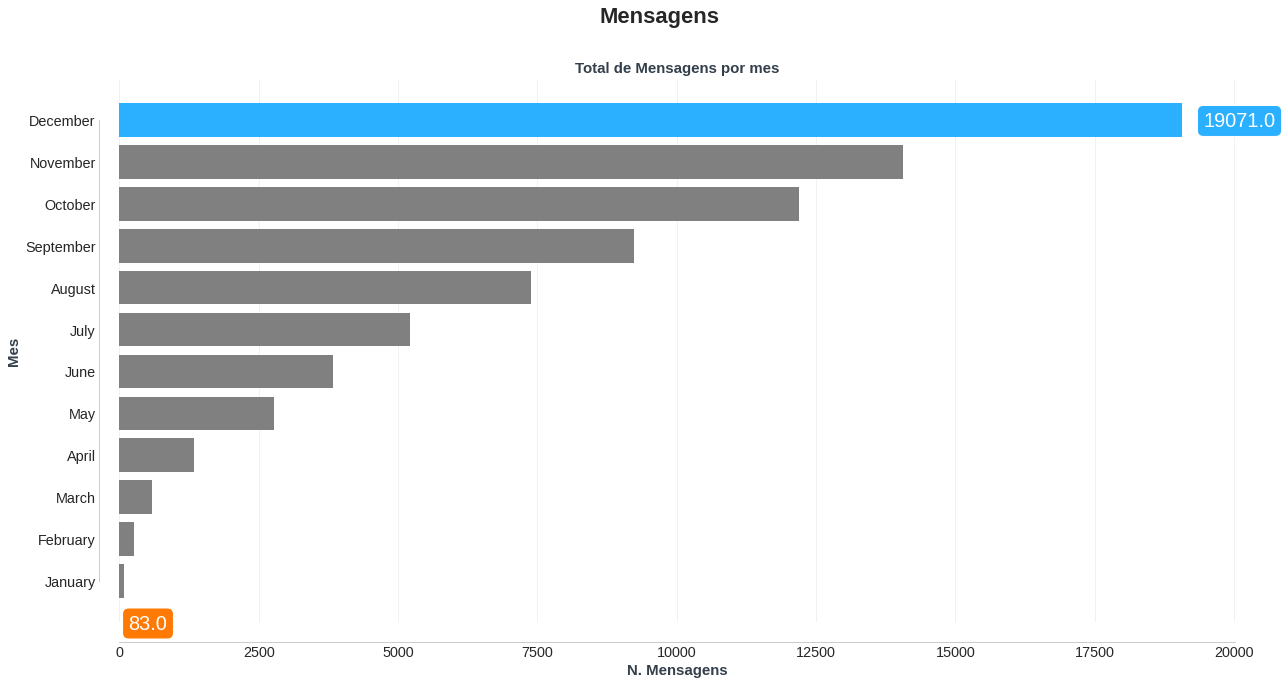

In [43]:
plot_bar(df_summary, 'mes_str', 'total_mensagens', 'mensagens', '???', 'mes', True, (20,10), "#2ab0ff" )

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Parabéns
</div>

## Chamadas

/tmp/ipykernel_44/2768126592.py:29: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axs.text( valormax * 1.02, (indiceMax) - .15 , \
/tmp/ipykernel_44/2768126592.py:34: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axs.text( valormin * 2, (indiceMin - 1) - .15 , \


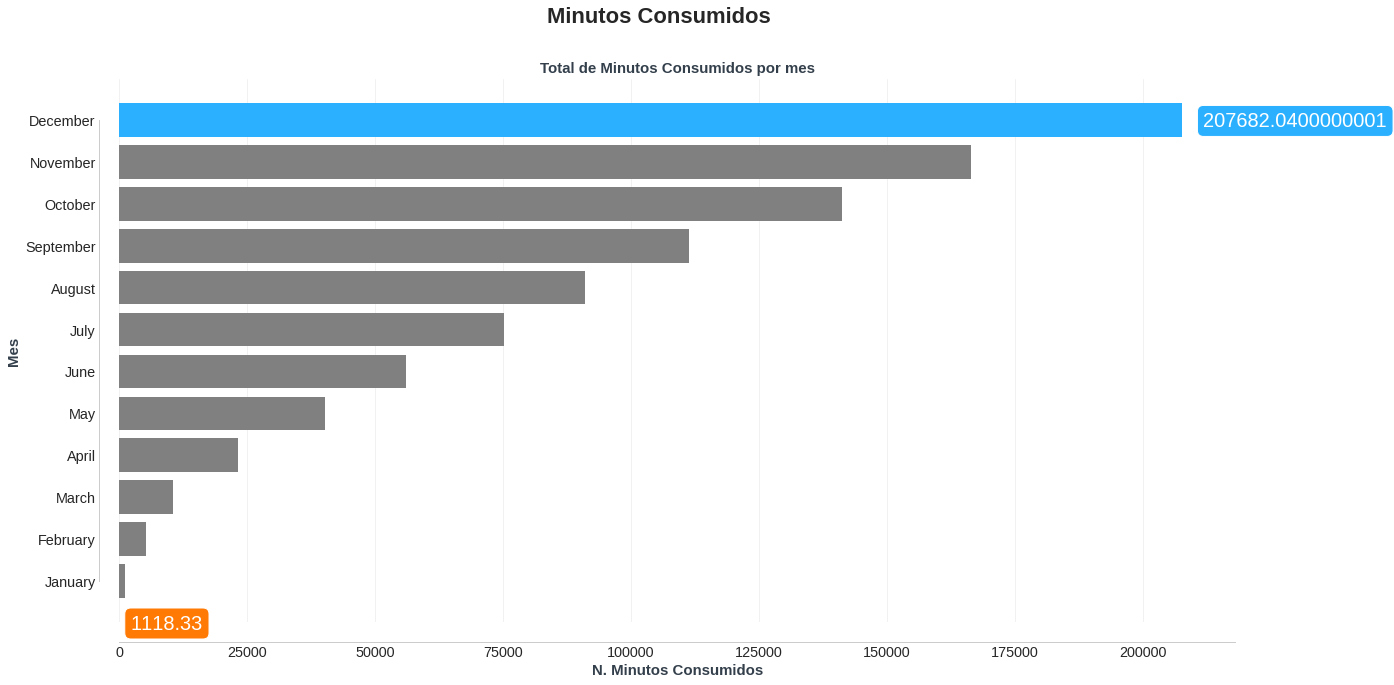

In [44]:
plot_bar(df_summary, 'mes_str', 'total_minutos', 'minutos consumidos', '???', 'mes', True, (20,10), "#2ab0ff" )

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Parabéns
</div>

## Dados

Para a visualizacao dos dados iremos apresentar a quantidade consumida em GB

In [45]:
df_summary['dados_gb'] = round ( df_summary['volume_dados'] / 1024 , 2)

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

/tmp/ipykernel_44/2768126592.py:29: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axs.text( valormax * 1.02, (indiceMax) - .15 , \
/tmp/ipykernel_44/2768126592.py:34: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axs.text( valormin * 2, (indiceMin - 1) - .15 , \


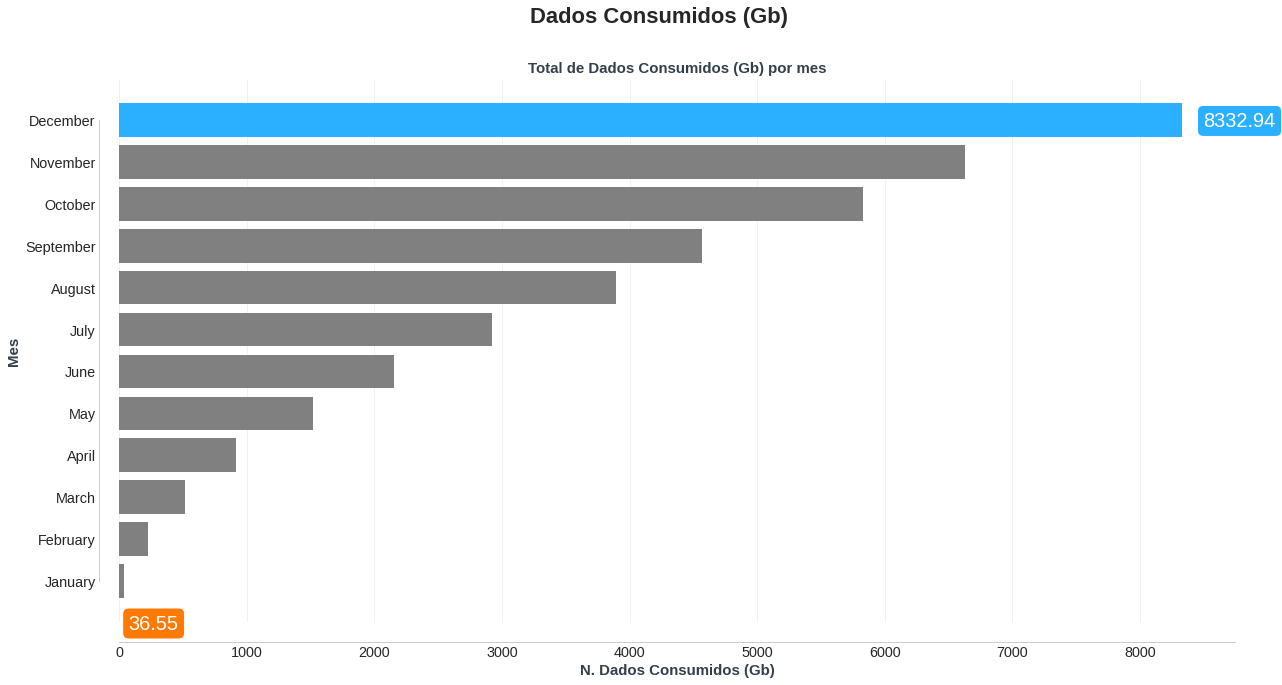

In [46]:
plot_bar(df_summary, 'mes_str', 'dados_gb', 'dados consumidos (GB)', '???', 'mes', True, (20,10), "#2ab0ff" )

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

# Consumo mensal geral

De modos a visualizar a comparacao de consumo entre os planos, iremos criar mais uma tabela dinamica com base no dataframe de controlo e separar os somatorios pela coluna `plan`

In [47]:
df_summary_month_plan = df_control.pivot_table(index=['mes','mes_str'], values=['total_mensagens','total_minutos','volume_dados'], aggfunc='sum', columns='plan')
df_summary_month_plan.style.bar(color = '#7acaff')

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

O passo seguinte consiste em isolar os dados do consumo de mensagens

In [48]:
df_summary_month_plan_msg = df_summary_month_plan.total_mensagens.reset_index()
df_summary_month_plan_msg.columns = ['mes_int','mes_str','surf', 'ultimate']
df_summary_month_plan_msg

,mes_int,mes_str,surf,ultimate
0,1.0,January,21.0,62.0
1,2.0,February,108.0,151.0
2,3.0,March,351.0,243.0
3,4.0,April,870.0,463.0
4,5.0,May,1849.0,931.0
5,6.0,June,2454.0,1379.0
6,7.0,July,3271.0,1937.0
7,8.0,August,4662.0,2732.0
8,9.0,September,5968.0,3259.0
9,10.0,October,8020.0,4181.0


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

A funcao abaixo tem o objectivo de apresentar um grafico de barras com a segregacao de **2** conjuntos de valores (plano surf e plano ultimate)

In [49]:
def plot_bar_2groups(dftemp: pd.DataFrame, colunaXIndex : str, colunaXLabels : str  , colunaY1 : str, colunaY2 : str, descricao: str, lblX: str, lblY, tamanho:tuple, expessura:float=0.35   ):

    fig, ax = plt.subplots(figsize=(tamanho))

    expessura = 0.35  # the width of the bars

    y1 = dftemp[colunaY1]
    y2 = dftemp[colunaY2]
    x = dftemp[colunaXIndex]

    rects1 = ax.barh(x - expessura/2 , y1, expessura, label=f'Plano {colunaY1}', color="#2ab0ff")
    rects2 = ax.barh(x + expessura/2, y2, expessura, label=f'Plano {colunaY2}', color="#1071b2")

    ax.set_yticks(x) # values
    ax.set_yticklabels(df_summary_month_plan_msg[colunaXLabels].unique().tolist()) # labels
    ax.xaxis.grid(True, color='#EEEEEE')
    ax.yaxis.grid(False)
    ax.spines['left'].set_visible(False) # Oculta a linha vertical da direita
    ax.spines['left'].set_position(('outward', 10)) # Dar espaçamento entre as barras e o eixo y

    ax.set_xlabel(lblX, fontsize=16)  
    ax.set_ylabel(lblY, fontsize=16)  
    ax.set_title(descricao, fontsize=22)  

    ax.legend( fontsize=16, loc='lower right')
    plt.show()

## Mensagens

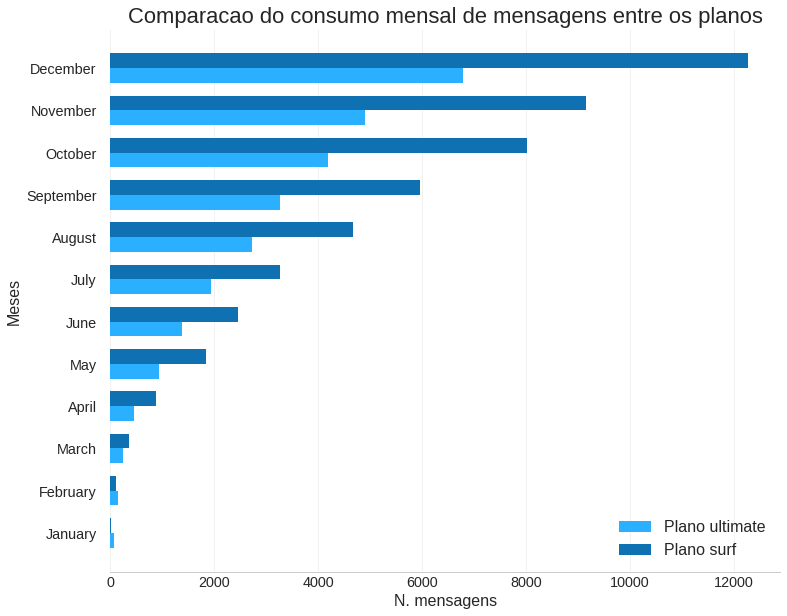

In [50]:
plot_bar_2groups(df_summary_month_plan_msg, 'mes_int', 'mes_str'  , 'ultimate', 'surf','Comparacao do consumo mensal de mensagens entre os planos', 'N. mensagens','Meses', (12,10), expessura=0.35 )


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Parabéns!
</div>

## Chamadas

O mesmo procedimento sera feito para o consumo de chamadas

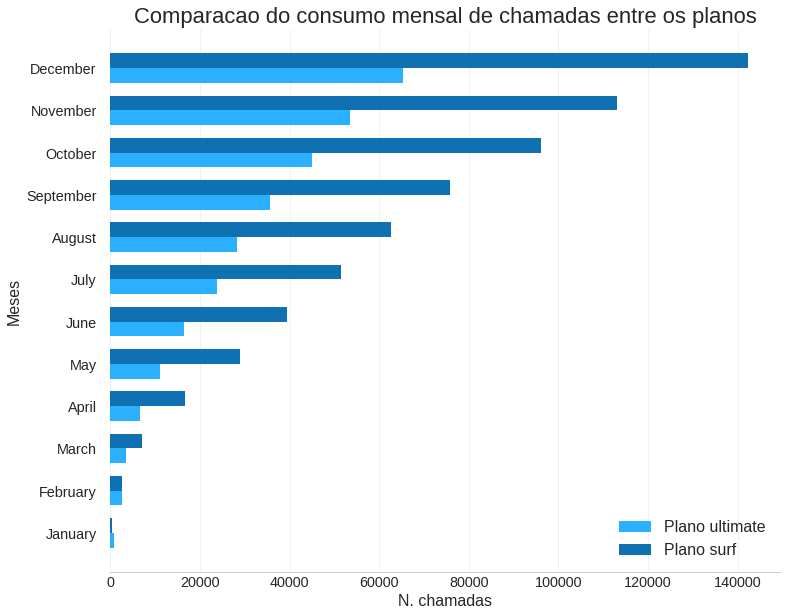

In [51]:
df_summary_month_plan_calls = df_summary_month_plan['total_minutos'].reset_index()
df_summary_month_plan_calls.columns = ['mes_int','mes_str','surf', 'ultimate']
plot_bar_2groups(df_summary_month_plan_calls, 'mes_int', 'mes_str'  , 'ultimate', 'surf','Comparacao do consumo mensal de chamadas entre os planos', 'N. chamadas','Meses', (12,10), expessura=0.35 )


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Excelente
</div>

## Dados

E por fim o grafico para o consumo mensal de dados por plano

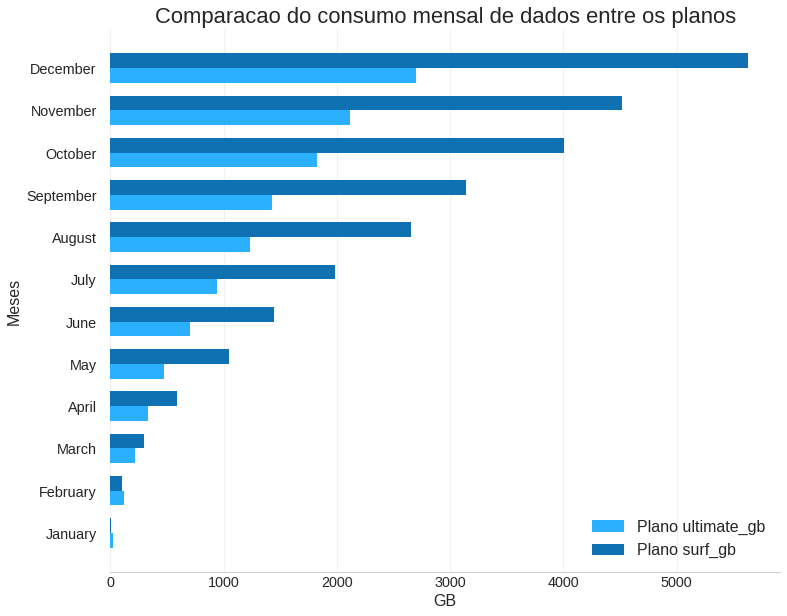

In [52]:
df_summary_month_plan_dados = df_summary_month_plan['volume_dados'].reset_index()
df_summary_month_plan_dados.columns = ['mes_int','mes_str','surf', 'ultimate']

df_summary_month_plan_dados['surf_gb'] = round (df_summary_month_plan_dados.surf / 1024 ,2)
df_summary_month_plan_dados['ultimate_gb'] = round (df_summary_month_plan_dados.ultimate / 1024 ,2)

#display(df_summary_month_plan_calls)

plot_bar_2groups(df_summary_month_plan_dados, 'mes_int', 'mes_str'  , 'ultimate_gb', 'surf_gb','Comparacao do consumo mensal de dados entre os planos', 'GB','Meses', (12,10), expessura=0.35 )


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Muito bom
</div>

# Coluna estados

Para facilitar a validacao de uma das hipoteses iremos criar uma coluna no dataframe de controlo com o estado de cada user 

A funcao abaixo ira repartir o texto que informa a cidade para cada user e extrair o estado.

In [53]:
def obter_estado(cidade : str):

    try:
        return cidade.split(',')[1].split(' ')[1] 
    except:
        return 'NAO FOI POSSIVEL EXTRAIR ESTADO!'

Aplicar a funcao para todos os registos.

In [54]:
df_control['estado'] = df_control.city.apply(obter_estado)

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Validar uma amostra

In [55]:
df_control.sample(5)[['city', 'estado']]

,city,estado
980,"Boston-Cambridge-Newton, MA-NH MSA",MA-NH
1373,"New York-Newark-Jersey City, NY-NJ-PA MSA",NY-NJ-PA
153,"Las Vegas-Henderson-Paradise, NV MSA",NV
971,"Bridgeport-Stamford-Norwalk, CT MSA",CT
1757,"Rochester, NY MSA",NY


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

# Comparacao dos planos

## Distribuicao do consumo para cada servico


**A funcao abaixo ira apresentar o seguinte:**

- Histograma 
- Grafico de caixa
- Histograma sem os valores atipicos na distribuicao
- Grafico de caixa sem os valores atipicos.

In [56]:
def plot_hist_e_box( dftemp, coluna, titulo, plano, tamanhofigura :tuple = (27,8) ):
    fig, axs = plt.subplots(1, 4)

    fig.set_size_inches(tamanhofigura)

      #fig.suptitle(f'---- {titulo.title()} Plano {plano.title()} -----', fontsize=20)
    display(HTML ('<hr>')) # Criar um alinha horizontal 
    display(HTML(f'<h2 style="color:#ffffff; background-color:#2ab0ff; display:inline-block">{titulo.title()} Plano {plano.title()}<h2>'))

    dados = dftemp.query('plan == @plano')

    axs[0].hist(dados[coluna], color=cor, rwidth = 0.9, edgecolor='#ffffff', linewidth=1)
    axs[0].yaxis.grid(True, color ="black", alpha=0.16)
    axs[0].xaxis.grid(False)
    axs[0].set_title('Histograma completo', fontsize=16)

    axs[1].boxplot(dados[coluna])
    axs[1].yaxis.grid(False)
    axs[1].xaxis.grid(False)
    axs[1].set_title('Box Plot completo', fontsize=16)

    q3 = dados[coluna].quantile(0.75)
    q1 = dados[coluna].quantile(0.25)

    iqr = q3 - q1
    lim_outlier1 = q1 - (1.5 * iqr)
    lim_outlier2 = q3 + (1.5* iqr)

    #dados = dados.query('@lim_outlier1 < total_minutos < @lim_outlier2')

    dados = dados [ (lim_outlier1 < dados[coluna]) &  ( dados[coluna] < lim_outlier2) ]
    axs[2].hist(dados[coluna], color=cor, rwidth = 0.9, edgecolor='#ffffff', linewidth=1)
    axs[2].yaxis.grid(True, color ="black", alpha=0.16)
    axs[2].xaxis.grid(False)
    axs[2].set_title('Histograma sem valores atipicos', fontsize=16)

    axs[3].boxplot(dados[coluna])
    axs[3].yaxis.grid(False)
    axs[3].xaxis.grid(False)
    axs[3].set_title('Box Plot sem valores atipicos', fontsize=16)

    plt.show()

## Chamadas

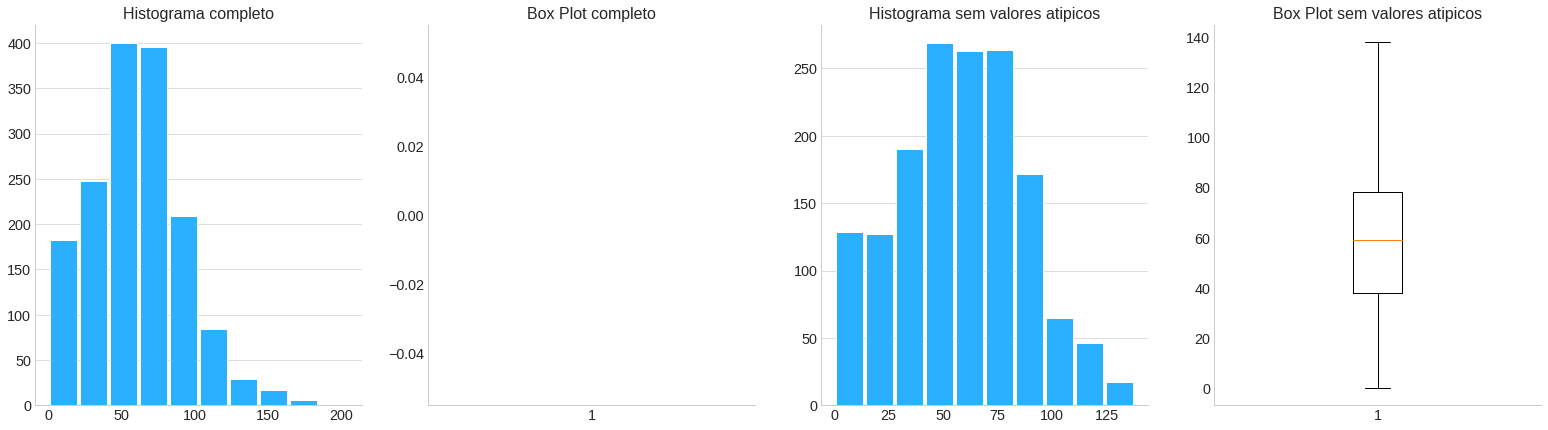

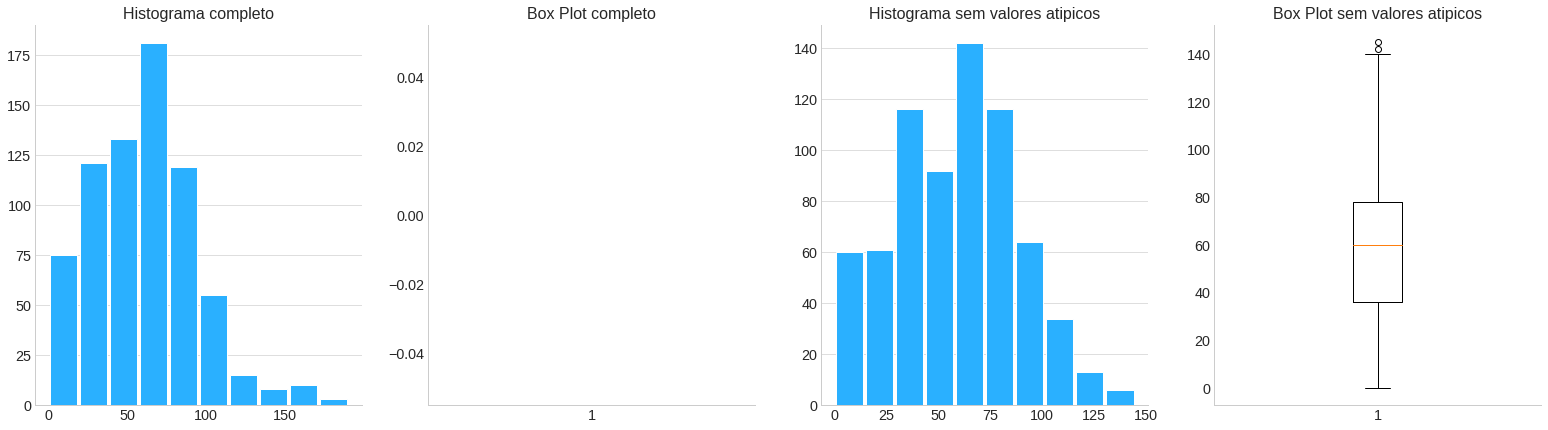

In [57]:
plot_hist_e_box( df_control, 'total_chamadas', "chamadas", "surf", (27,7) )
plot_hist_e_box( df_control, 'total_chamadas', "chamadas", "ultimate", (27,7) )

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

## Mensagens

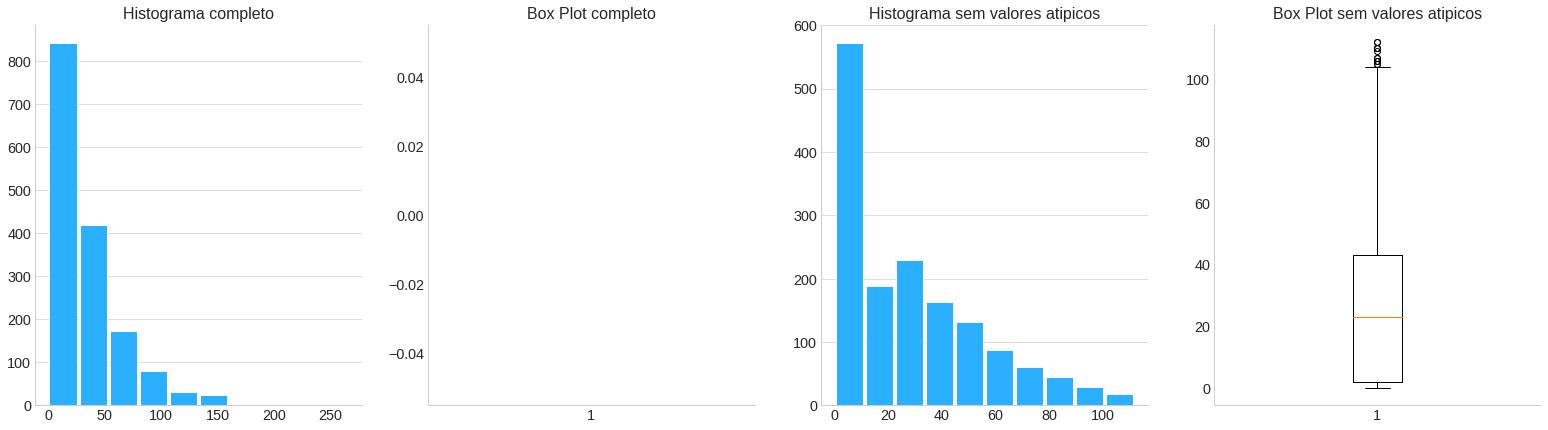

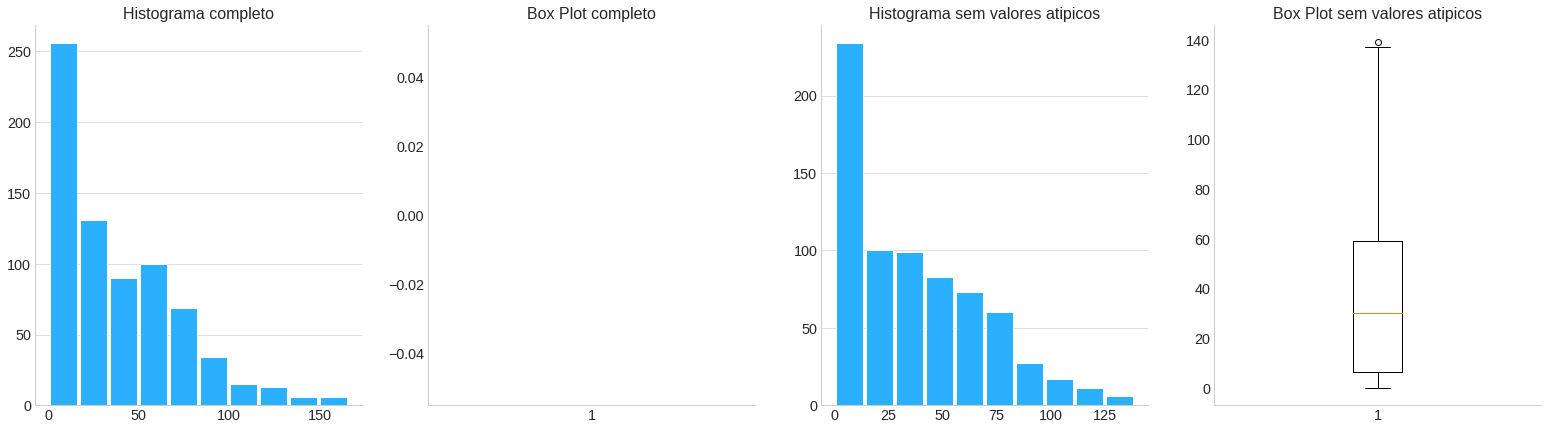

In [58]:
plot_hist_e_box( df_control, 'total_mensagens', "mensagens", "surf", (27,7) )
plot_hist_e_box( df_control, 'total_mensagens', "mensagens", "ultimate", (27,7) )

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

## Dados

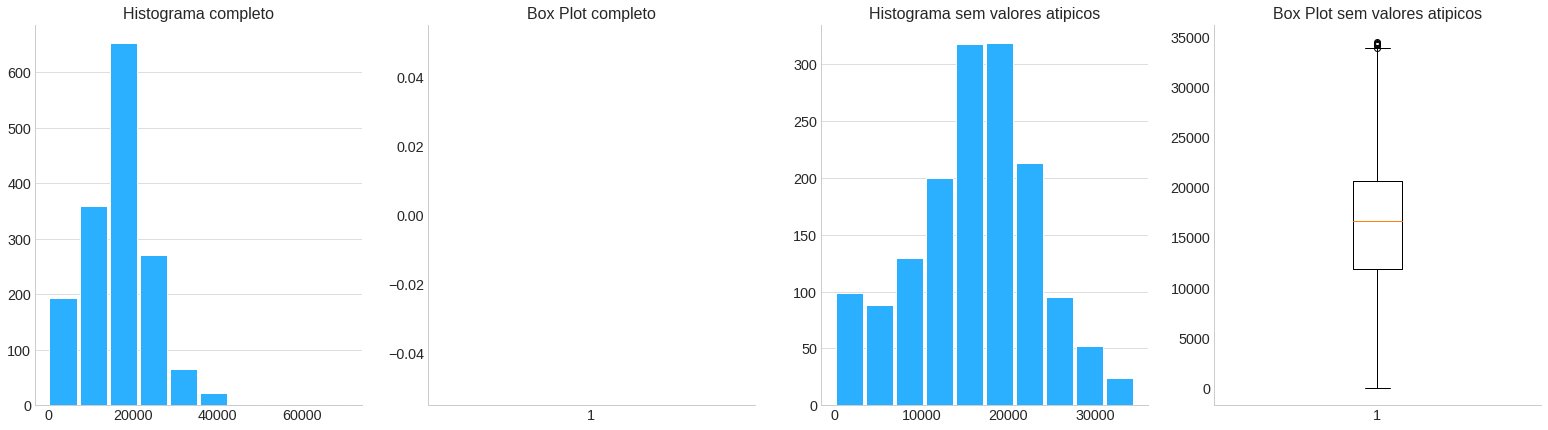

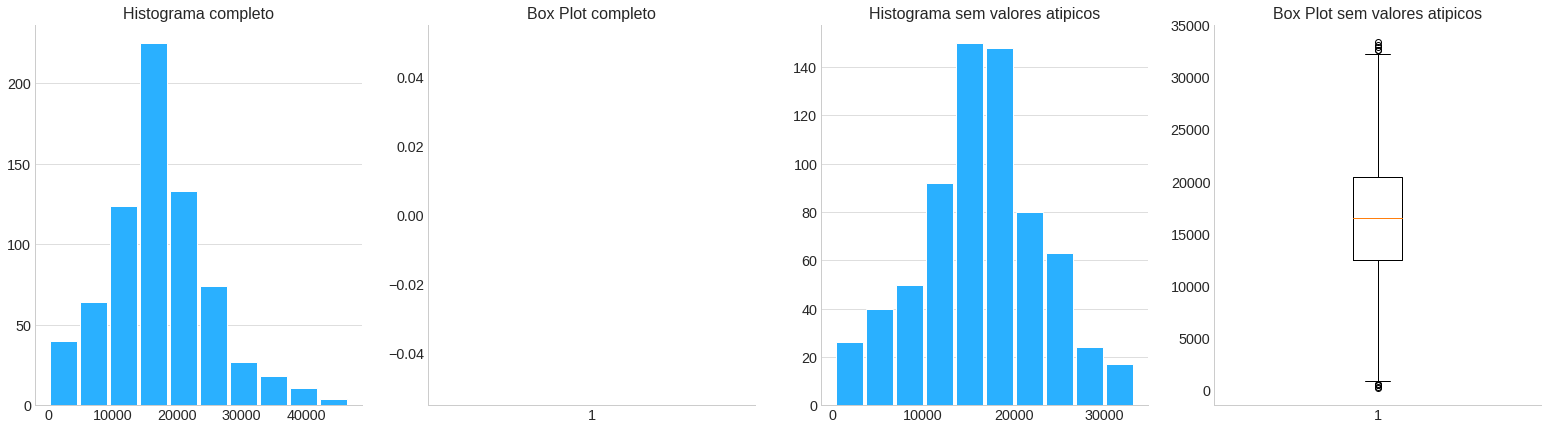

In [59]:
plot_hist_e_box( df_control, 'volume_dados', "dados", "surf", (27,7) )
plot_hist_e_box( df_control, 'volume_dados', "dados", "ultimate", (27,7) )

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

# Receita

A seguir iremos olhar para a receita total por plano e oferecer uma resposta simples e clara sobre os rendimentos de cada plano. 

/tmp/ipykernel_44/678942720.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(dfrenda_mensal['mes_str'], rotation=0, ha='center')
/tmp/ipykernel_44/678942720.py:31: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axs.text ( indice1 , valor1 , f'{valor1} USD', fontsize='20', color='white', ha = 'left', Bbox = dict(facecolor = f'{cor}', alpha = 1, edgecolor='#ffffff', boxstyle='round,pad=.3')  )
/tmp/ipykernel_44/678942720.py:35: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axs.text ( indice2 , valor2 , f'{valor2} USD', fontsize='20', color='white', ha = 'left', Bbox = dict(facecolor = f'{cor2}', alpha = 1, edgecolor='#ffffff', boxstyle='round,pad=.3')  )


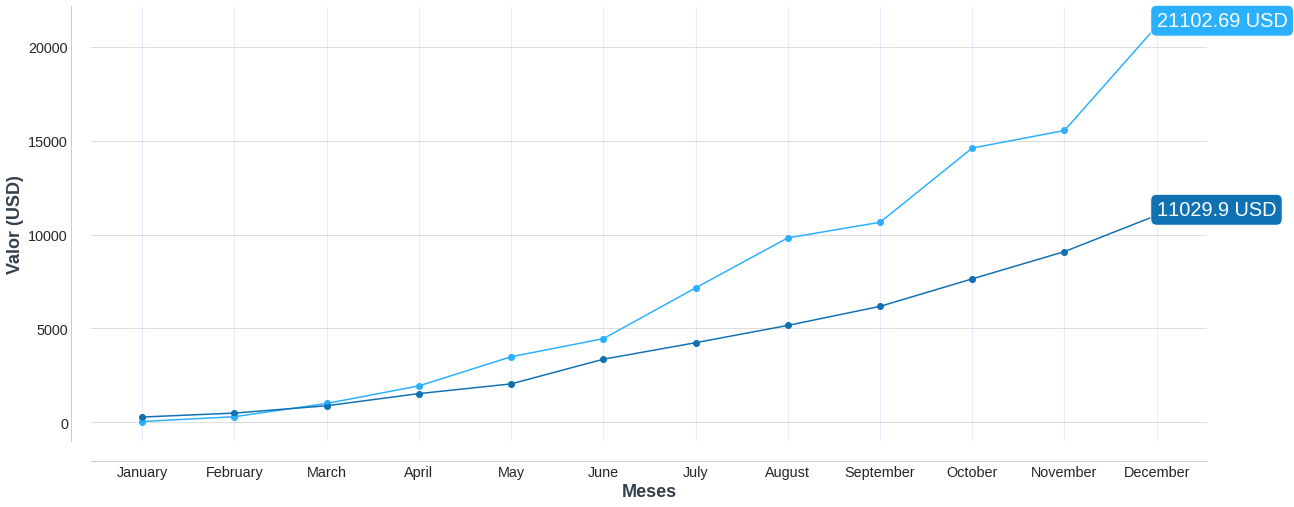

In [60]:
plano = 'surf'
plano2 = 'ultimate'
coluna = 'custo_mensal_user'
tamanhofigura :tuple = (20,8)
titulo = 'Receita Mensal'

display(HTML ('<hr>')) # Criar um alinha horizontal 
display(HTML(f'<h2 style="color:#ffffff; background-color:{cor}; display:inline">{titulo.title()} Plano {plano.title()}<h2>'))
display(HTML(f'<h2 style="color:#333F4B; background-color:#ffffff; display:inline">vs<h2>'))
display(HTML(f'<h2 style="color:#ffffff; background-color:{cor2}; display:inline">{titulo.title()} Plano {plano2.title()}<h2>'))

dfrenda_mensal = df_control[ df_control['plan'] == plano ].pivot_table(index=['mes','mes_str'], values = coluna, aggfunc='sum' ).reset_index()
dfrenda_mensal2 = df_control[ df_control['plan'] == plano2 ].pivot_table(index=['mes','mes_str'], values = coluna, aggfunc='sum' ).reset_index()

fig, axs = plt.subplots(1, 1)

fig.set_size_inches(tamanhofigura)

axs.plot( dfrenda_mensal['mes_str'], dfrenda_mensal[coluna], color=cor , label=f'Plano {plano}')
axs.scatter( dfrenda_mensal['mes_str'], dfrenda_mensal[coluna], color=cor )

axs.plot( dfrenda_mensal2['mes_str'], dfrenda_mensal2[coluna], color=cor2, label=f'Plano {plano2}')
axs.scatter( dfrenda_mensal2['mes_str'], dfrenda_mensal2[coluna] , color=cor2)

axs.yaxis.grid(True, color ="black", alpha=0.16)
axs.xaxis.grid(True, color ="blue", alpha=0.1)
axs.set_xticklabels(dfrenda_mensal['mes_str'], rotation=0, ha='center')

valor1 = round( dfrenda_mensal.iloc[-1].custo_mensal_user, 2)
indice1 = dfrenda_mensal.iloc[-1].name
axs.text ( indice1 , valor1 , f'{valor1} USD', fontsize='20', color='white', ha = 'left', Bbox = dict(facecolor = f'{cor}', alpha = 1, edgecolor='#ffffff', boxstyle='round,pad=.3')  )

valor2 = round( dfrenda_mensal2.iloc[-1].custo_mensal_user, 2)
indice2 = dfrenda_mensal2.iloc[-1].name
axs.text ( indice2 , valor2 , f'{valor2} USD', fontsize='20', color='white', ha = 'left', Bbox = dict(facecolor = f'{cor2}', alpha = 1, edgecolor='#ffffff', boxstyle='round,pad=.3')  )

axs.set_ylabel('Valor (USD)', fontsize=18, fontweight='black', color = '#333F4B')
axs.set_xlabel(f'Meses', fontsize=18, fontweight='black', color = '#333F4B')
axs.spines['left'].set_position(('outward', 20)) # Dar espaçamento entre as barras e o eixo y
axs.spines['bottom'].set_position(('outward', 20)) # Dar espaçamento entre a primeira barra de baixo e o eixo x

plt.show()

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

# Hipoteses

## Hipotese 1

Temos como objectivo responder se as receitas medias dos planos sao iguais ou nao, deste modo formulamos as seguintes hipoteses

**hipótese nula H₀:** 
- "A receita média dos usuários dos planos Ultimate e Surf são iguais."


**hipótese alternativa H₁, é baseada em H₀. Para este H₀, H₁ sera:**
- “A receita media dos usuarios dos planos Ultimate e Surf sao diferentes.”

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Hipóteses corretas
</div>

**Usaremos o valor-p para decidir se aceita ou rejeita a hipótese nula**

Se esse valor for maior que **10%**, não iremos rejeitar a hipótese nula.  
Se o valor-p for menor que 10%, iremos rejeitar a hipótese nula. 

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto, porém o comum é usar p=0.05 ou p=0.01
</div>

Para testar sua hipótese de que as médias de **dois conjuntos** são iguais com base nas amostras retiradas iremos aplicar o método:

`scipy.stats.ttest_ind`

In [61]:
mediaSurf = np.mean(dfrenda_mensal.custo_mensal_user )
mediaUltimate =np.mean(dfrenda_mensal2.custo_mensal_user )

varianciaSurf = np.var(dfrenda_mensal.custo_mensal_user )
varianciaUltimate =np.var(dfrenda_mensal2.custo_mensal_user )

desvioPadSurf = np.std(dfrenda_mensal.custo_mensal_user )
desvioPadUltimate =np.std(dfrenda_mensal2.custo_mensal_user )

print ( 'Recita Plano Surf, Media:', mediaSurf, '')
print ( 'Recita Plano Ultimate, Media:', mediaUltimate )
print ( 'Recita Plano Surf, Variancia:', varianciaSurf, '')
print ( 'Recita Plano Ultimate, Variancia:', varianciaUltimate )
print ( 'Recita Plano Surf, Desvio Padrao:', desvioPadSurf, '')
print ( 'Recita Plano Ultimate, Desvio Padrao:', desvioPadUltimate )

Recita Plano Surf, Media: 7510.260194856773 
Recita Plano Ultimate, Media: 4326.964778645833
Recita Plano Surf, Variancia: 43485246.390551634 
Recita Plano Ultimate, Variancia: 11642472.750684276
Recita Plano Surf, Desvio Padrao: 6594.334416038637 
Recita Plano Ultimate, Desvio Padrao: 3412.106790633065


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

As variancias nao sao aproximadamente iguais entao o parametro `equal_var` recebera o valor `False`

In [62]:
alpha = 0.05  # significância estatística crítica

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Isso. Usamos alpha = 0.05 ou 0.01
</div>

### Resultado da hipotese

In [63]:
results = st.ttest_ind(dfrenda_mensal.custo_mensal_user, dfrenda_mensal2.custo_mensal_user, equal_var = False )

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("\nHipótese nula sera rejeitada! ")
else:
    print("\nNão podemos rejeitar a hipótese nula! ")

p-value:  0.17366912316980296

Não podemos rejeitar a hipótese nula! 


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

## Hipotese 2

A receita média dos usuários da área de NY-NJ é diferente dos usuários de outras regiões.


**Hipótese nula:**

H₀: A receita média dos usuários das áreas NJ-NY e demais áreas são iguas.

**Hipótese alternativa:**

H1: A receita média dos usuários das áreas NJ-NY e demais áreas são diferentes.



Para validar esta hipotese precisamos criar as condicoes para o teste.

Iremos separar o dataframe de controlo pelos estado

In [64]:
estados = df_control.estado.unique().tolist()

In [65]:
lista_filtro = []
for estado in estados:
    if 'NJ' in estado or 'NY' in estado:
        print(estado)
        lista_filtro.append(estado)

NY-NJ-PA
PA-NJ-DE-MD
NY


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Iremos separar os dataframes com base nos 3 estados acima.

In [66]:
df_NJ_NY = df_control.query('estado in @lista_filtro')

df_Others = df_control.query('estado not in @lista_filtro')

print('Clientes nos estados NJ-NY: ',len(df_NJ_NY))
print('Clientes em outros estados: ',len(df_Others))

Clientes nos estados NJ-NY:  489
Clientes em outros estados:  1814


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Iremos olhar a distribuicao de valores para as duas amostras.

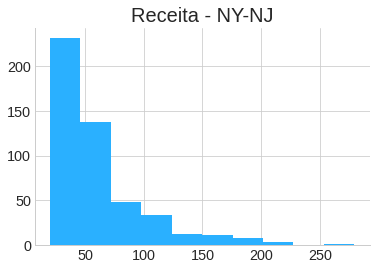

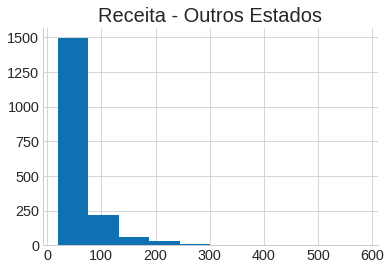

In [67]:
df_NJ_NY.custo_mensal_user.hist(color=cor)
plt.title('Receita - NY-NJ', fontsize=20)
plt.show()
df_Others.custo_mensal_user.hist(color=cor2)
plt.title('Receita - Outros Estados', fontsize=20)
plt.show()

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [68]:
df_NJ_NY_calc = np.mean(df_NJ_NY.custo_mensal_user)
df_Others_calc = np.mean(df_Others.custo_mensal_user)

print ( 'Receita Estados NY-NJ, Variancia:', df_NJ_NY_calc, '')
print ( 'Receita Outros Estados, Variancia:', df_Others_calc )

df_NJ_NY_calc = np.var(df_NJ_NY.custo_mensal_user)
df_Others_calc = np.var(df_Others.custo_mensal_user)

print ( 'Receita Estados NY-NJ, Variancia:', df_NJ_NY_calc, '')
print ( 'Receita Outros Estados, Variancia:', df_Others_calc )

df_NJ_NY_calc = np.std(df_NJ_NY.custo_mensal_user)
df_Others_calc = np.std(df_Others.custo_mensal_user)

print ( 'Receita Estados NY-NJ, Desvio Padrao:', df_NJ_NY_calc, '')
print ( 'Receita Outros Estados, Desvio Padrao:', df_Others_calc )

Receita Estados NY-NJ, Variancia: 58.7929550349885 
Receita Outros Estados, Variancia: 62.677477767321875
Receita Estados NY-NJ, Variancia: 1970.2343569336663 
Receita Outros Estados, Variancia: 2079.744166642333
Receita Estados NY-NJ, Desvio Padrao: 44.38732202930997 
Receita Outros Estados, Desvio Padrao: 45.60421215899177


Tendo as varianças das receitas diferentes utilizaremos o parametro equal_var como False.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Há testes de hipótese vai avaliar variância igual. É uma boa opção
</div>

### Resultado da hipotese

In [69]:
results = st.ttest_ind(df_NJ_NY.custo_mensal_user, df_Others.custo_mensal_user, equal_var = False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("\nHipótese nula sera rejeitada! ")
else:
    print("\nNão podemos rejeitar a hipótese nula! ")

p-value: 0.08839834412044557

Não podemos rejeitar a hipótese nula! 


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [70]:
#print( df_control.query('plan == "surf"').custo_mensal_user.mean() )
#print( df_control.query('plan == "surf"').custo_mensal_user.sum() )
#print( df_control.query('plan == "ultimate"').custo_mensal_user.mean() )
#print( df_control.query('plan == "ultimate"').custo_mensal_user.sum() )

# Conclusão

Feita a analise dos conjuntos de dados para os planos `ultimate` e `surf` de **500 clientes** da empresa **Megaline Telecomunicacoes** podemos deixar algumas observacoes claras e objectivas:

- Os graficos de linha apresentados mostram um **<font color='green'> crescimento saudavel</font>** tanto no consumo dos servicos de chamadas, mensagens e internet bem como na receita mensal mensal pelo consumo.

- O mes com maior **<font color='green'>retorno positivo</font>** e **Dezembro** para ambos os planos provavelmente influenciado pelas epocas festivas.

- A partir de **<font color='orange'>Junho</font>** comecamos a ter uma disparidade mais acentuada na receita dos dois planos, terminando assim ate o final do ano com o plano **<font color='green'>surf o mais rentavel</font>** para a Megaline.

- Os planos nao tem a mesma receita media, ficando na frente o plano **<font color='green'>Ultimate</font>** com `72 usd` vs `57 usd` do plano `Surf`. 

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Gerson, você fez um excelente trabalho. Você programa bem e apresenta conhecimentos avançados. Indico apenas ler o material sobre a performance da função query(), o fato da função retornar valores negativos e test de hipótese para variância (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html)
Você demonstra potencial e maturidade, programa bem e de forma eficiente. Parabéns!
</div>



> Obrigado,
<font color='blue'>Gerson Barroso.</font>